# Fase 1: Data Cleaning
Kailin Wu

In [120]:
# Importar librerías
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Manipulación y preparación de datos

In [40]:
# Cargar datos modificados
df_modified = pd.read_csv('data/interim/steel_energy_modified.csv')
df_modified.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
0,01/01/2018 00:15,3.17,2.95,0.0,NaN,73.21,100.0,900.0,Weekday,Monday,Light_Load,649
1,01/01/2018 00:30,4.0,4.46,0.0,0.0,66.77,100.0,1800.0,Weekday,Monday,Light_Load,NaN
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700.0,Weekday,Monday,Light_Load,696
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600.0,Weekday,Monday,Light_Load,630
4,01/01/2018 01:15,3.82,4.5,0.0,0.0,64.72,100.0,4500.0,Weekday,Monday,Light_Load,325


In [39]:
# Tipos de datos (modificados)
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35740 entries, 0 to 35739
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   date                                  35401 non-null  object
 1   Usage_kWh                             35339 non-null  object
 2   Lagging_Current_Reactive.Power_kVarh  35339 non-null  object
 3   Leading_Current_Reactive_Power_kVarh  35327 non-null  object
 4   CO2(tCO2)                             35370 non-null  object
 5   Lagging_Current_Power_Factor          35291 non-null  object
 6   Leading_Current_Power_Factor          35338 non-null  object
 7   NSM                                   35325 non-null  object
 8   WeekStatus                            35400 non-null  object
 9   Day_of_week                           35428 non-null  object
 10  Load_Type                             35432 non-null  object
 11  mixed_type_col              

In [100]:
# Obtener columans por tipo
df_cleaned = df_modified.copy()

date_cols = ['date']
object_cols = ['WeekStatus', 'Load_Type', 'Day_of_week']
num_cols = list(set(df_cleaned.columns) - set(date_cols) - set(object_cols))

col_mapping = {
    'datetime': date_cols,
    'object': object_cols,
    'float': num_cols
}

In [101]:
# Identificar valores unicos de cada columna de texto
for col in object_cols:
    display(df_cleaned[col].unique())

array(['Weekday', ' wEEKDAY ', nan, 'Weekend', ' wEEKEND ', ' NAN '],
      dtype=object)

array(['Light_Load', ' lIGHT_lOAD ', nan, 'Medium_Load', 'Maximum_Load',
       ' mEDIUM_lOAD ', ' mAXIMUM_lOAD ', ' NAN '], dtype=object)

array(['Monday', ' mONDAY ', ' tUESDAY ', 'Tuesday', 'Wednesday',
       ' wEDNESDAY ', 'Thursday', ' tHURSDAY ', 'Friday', ' fRIDAY ',
       'Saturday', ' sATURDAY ', 'Sunday', ' sUNDAY ', nan, ' NAN '],
      dtype=object)

In [102]:
# Clean columns
for col in num_cols:
    df_cleaned[col] = df_cleaned[col].replace(regex=r"[^0-9.,]", value=np.nan)

for col in object_cols:
    df_cleaned[col] = df_cleaned[col].str.strip()
    df_cleaned[col] = df_cleaned[col].str.upper()
    df_cleaned[col] = df_cleaned[col].replace('NAN', np.nan)

for col in date_cols:
    df_cleaned[col] = df_cleaned[col].str.strip()

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35740 entries, 0 to 35739
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   date                                  35401 non-null  object
 1   Usage_kWh                             33466 non-null  object
 2   Lagging_Current_Reactive.Power_kVarh  33431 non-null  object
 3   Leading_Current_Reactive_Power_kVarh  33449 non-null  object
 4   CO2(tCO2)                             33484 non-null  object
 5   Lagging_Current_Power_Factor          33456 non-null  object
 6   Leading_Current_Power_Factor          33458 non-null  object
 7   NSM                                   33456 non-null  object
 8   WeekStatus                            35378 non-null  object
 9   Day_of_week                           35413 non-null  object
 10  Load_Type                             35412 non-null  object
 11  mixed_type_col              

In [103]:
# Verificar limpieza preliminar
for col in object_cols:
    display(df_cleaned[col].unique())


array(['WEEKDAY', nan, 'WEEKEND'], dtype=object)

array(['LIGHT_LOAD', nan, 'MEDIUM_LOAD', 'MAXIMUM_LOAD'], dtype=object)

array(['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY',
       'SUNDAY', nan], dtype=object)

In [105]:
df_casted = df_cleaned.copy()

# Castear columans a tipo correcto
for type, cols in col_mapping.items():
    for col in cols:
        if col != 'date':
            df_casted[col] = df_casted[col].astype(type)
        else:
            df_casted[col] = pd.to_datetime(df_casted[col], format='%d/%m/%Y %H:%M')

df_casted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35740 entries, 0 to 35739
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35378 non-null  datetime64[ns]
 1   Usage_kWh                             33466 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  33431 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  33449 non-null  float64       
 4   CO2(tCO2)                             33484 non-null  float64       
 5   Lagging_Current_Power_Factor          33456 non-null  float64       
 6   Leading_Current_Power_Factor          33458 non-null  float64       
 7   NSM                                   33456 non-null  float64       
 8   WeekStatus                            35378 non-null  object        
 9   Day_of_week                           35413 non-null  object        
 10

In [107]:
# Checar cantidad de nulos por columna
df_casted.isna().sum()

date                                      362
Usage_kWh                                2274
Lagging_Current_Reactive.Power_kVarh     2309
Leading_Current_Reactive_Power_kVarh     2291
CO2(tCO2)                                2256
Lagging_Current_Power_Factor             2284
Leading_Current_Power_Factor             2282
NSM                                      2284
WeekStatus                                362
Day_of_week                               327
Load_Type                                 328
mixed_type_col                          10644
dtype: int64

In [115]:
# Probar identificar si es posible imputar datos en fechas
display(df_casted.iloc[[19,20,21], :])
display(df_casted.iloc[[58,59,60], :])
display(df_casted.iloc[[109,110,111], :])

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
19,2018-01-01 05:00:00,3.31,3.60,0.0,0.0,67.68,100.0,18000.0,WEEKDAY,MONDAY,LIGHT_LOAD,NaN
20,NaT,3.56,4.07,0.0,0.0,65.84,NaN,18900.0,WEEKDAY,MONDAY,LIGHT_LOAD,NaN
21,2018-01-01 05:30:00,3.56,NaN,0.0,0.0,65.56,100.0,19800.0,WEEKDAY,MONDAY,LIGHT_LOAD,798.0


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
58,2018-01-01 14:45:00,4.10,0.0,22.10,0.0,100.0,18.24,53100.0,WEEKDAY,MONDAY,LIGHT_LOAD,116.0
59,NaT,3.64,0.0,16.70,0.0,NaN,21.30,54000.0,WEEKDAY,MONDAY,LIGHT_LOAD,86.0
60,2018-01-01 15:15:00,3.92,0.0,19.33,0.0,100.0,19.87,54900.0,WEEKDAY,MONDAY,LIGHT_LOAD,493.0


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
109,2018-01-02 03:30:00,NaN,4.03,0.0,NaN,66.21,100.0,12600.0,WEEKDAY,TUESDAY,LIGHT_LOAD,NaN
110,NaT,3.24,3.49,0.0,0.0,68.04,100.0,13500.0,WEEKDAY,TUESDAY,LIGHT_LOAD,NaN
111,2018-01-02 04:00:00,3.89,4.64,0.0,0.0,64.25,100.0,14400.0,WEEKDAY,TUESDAY,LIGHT_LOAD,955.0


In [116]:
df_imputed = df_casted.copy()

# Imputar nulos tomando en cuenta 15 minutos adiconales al timestamp anterior
for i in range(1, len(df_imputed)):
    if pd.isna(df_imputed.loc[i, 'date']):
        df_imputed.loc[i, 'date'] = df_imputed.loc[i-1, 'date'] + pd.Timedelta(minutes=15)

df_imputed.isna().sum()

date                                        0
Usage_kWh                                2274
Lagging_Current_Reactive.Power_kVarh     2309
Leading_Current_Reactive_Power_kVarh     2291
CO2(tCO2)                                2256
Lagging_Current_Power_Factor             2284
Leading_Current_Power_Factor             2282
NSM                                      2284
WeekStatus                                362
Day_of_week                               327
Load_Type                                 328
mixed_type_col                          10644
dtype: int64

In [117]:
# Corroborar con ejemplos anteriores
display(df_imputed.iloc[[19,20,21], :])
display(df_imputed.iloc[[58,59,60], :])
display(df_imputed.iloc[[109,110,111], :])

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
19,2018-01-01 05:00:00,3.31,3.60,0.0,0.0,67.68,100.0,18000.0,WEEKDAY,MONDAY,LIGHT_LOAD,NaN
20,2018-01-01 05:15:00,3.56,4.07,0.0,0.0,65.84,NaN,18900.0,WEEKDAY,MONDAY,LIGHT_LOAD,NaN
21,2018-01-01 05:30:00,3.56,NaN,0.0,0.0,65.56,100.0,19800.0,WEEKDAY,MONDAY,LIGHT_LOAD,798.0


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
58,2018-01-01 14:45:00,4.10,0.0,22.10,0.0,100.0,18.24,53100.0,WEEKDAY,MONDAY,LIGHT_LOAD,116.0
59,2018-01-01 15:00:00,3.64,0.0,16.70,0.0,NaN,21.30,54000.0,WEEKDAY,MONDAY,LIGHT_LOAD,86.0
60,2018-01-01 15:15:00,3.92,0.0,19.33,0.0,100.0,19.87,54900.0,WEEKDAY,MONDAY,LIGHT_LOAD,493.0


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,mixed_type_col
109,2018-01-02 03:30:00,NaN,4.03,0.0,NaN,66.21,100.0,12600.0,WEEKDAY,TUESDAY,LIGHT_LOAD,NaN
110,2018-01-02 03:45:00,3.24,3.49,0.0,0.0,68.04,100.0,13500.0,WEEKDAY,TUESDAY,LIGHT_LOAD,NaN
111,2018-01-02 04:00:00,3.89,4.64,0.0,0.0,64.25,100.0,14400.0,WEEKDAY,TUESDAY,LIGHT_LOAD,955.0


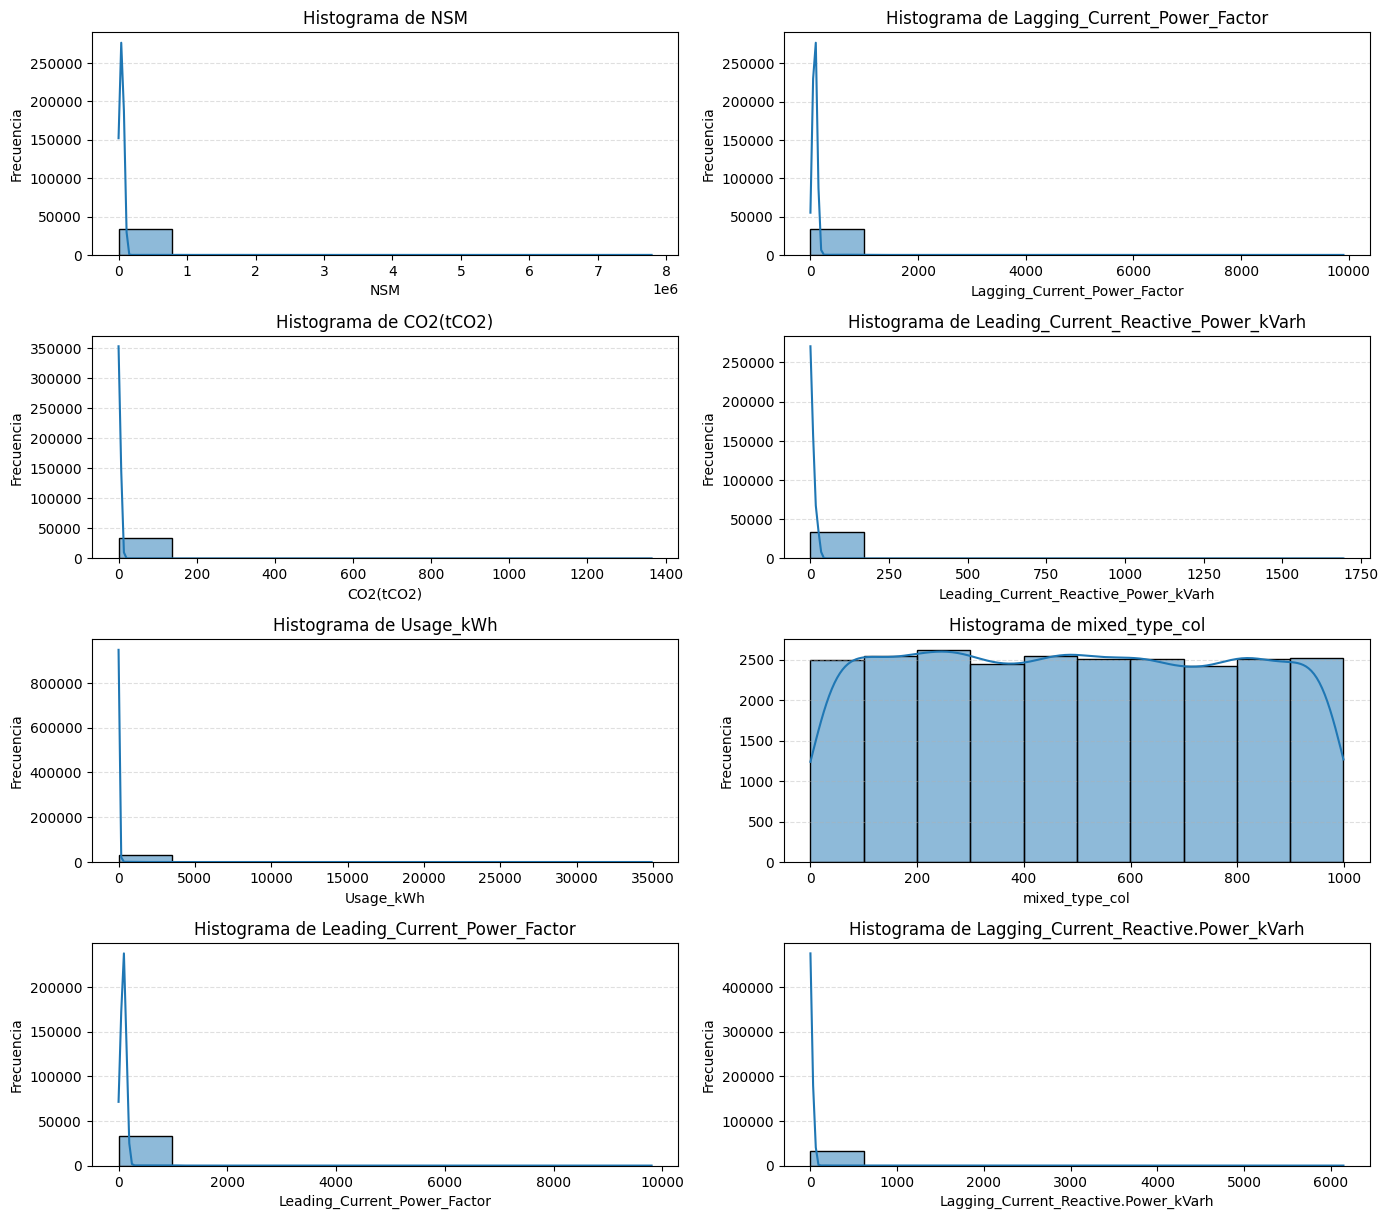

In [133]:
#Histograma de las variables númericas
plt.figure(figsize=(14, 24))

for i, col in enumerate(num_cols):
    plt.subplot(8, 2, i+1)
    plt.title(f"Histograma de {col}")
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha = 0.4)
    #Graficar 
    sns.histplot(df_imputed[col], bins = 10, kde = True)

plt.tight_layout()


In [135]:
# Usar describe para complementar gráficas
df_imputed.describe()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,mixed_type_col
count,35740,33466.000000,33431.000000,33449.000000,33484.000000,33456.000000,33458.000000,3.345600e+04,25096.000000
mean,2018-07-02 12:21:56.583659776,39.257699,18.830111,7.568952,2.605081,101.344032,109.598701,5.286249e+04,497.651857
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2018-04-02 06:11:15,3.240000,2.300000,0.000000,0.000000,63.560000,99.720000,2.160000e+04,247.000000
50%,2018-07-02 11:37:30,4.610000,5.040000,0.000000,0.000000,88.185000,100.000000,4.320000e+04,495.000000
75%,2018-10-01 19:03:45,52.020000,23.400000,2.630000,0.020000,99.420000,100.000000,6.480000e+04,749.000000
max,2018-12-31 23:45:00,34899.480000,6145.920000,1694.220000,1364.040000,9900.000000,9800.000000,7.783200e+06,999.000000
std,NaN,279.272205,91.360766,53.377463,41.252285,313.769137,373.790035,1.949596e+05,288.460245


In [137]:
# Imputar mayoría de columnas numéricas con mediana, media para mixed_type_col
for col in num_cols:
    value = df_imputed[col].median() if col == 'mixed_type_col' else df_imputed[col].mean()
    df_imputed[col] = df_imputed[col].fillna(value)

df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35740 entries, 0 to 35739
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35740 non-null  datetime64[ns]
 1   Usage_kWh                             35740 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35740 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35740 non-null  float64       
 4   CO2(tCO2)                             35740 non-null  float64       
 5   Lagging_Current_Power_Factor          35740 non-null  float64       
 6   Leading_Current_Power_Factor          35740 non-null  float64       
 7   NSM                                   35740 non-null  float64       
 8   WeekStatus                            35378 non-null  object        
 9   Day_of_week                           35413 non-null  object        
 10

In [155]:
# Para Day Of Week y WeekStatus se puede derivar de date
df_imputed['Day_of_week'] = df_imputed['Day_of_week'].fillna(df_imputed['date'].dt.day_name().str.upper())
df_imputed['WeekStatusNum'] = df_imputed['date'].dt.dayofweek
df_imputed['WeekStatus'] = df_imputed['WeekStatus'].fillna(df_imputed['WeekStatusNum'].apply(lambda x: 'WEEKEND' if x >= 5 else 'WEEKDAY'))

df_imputed = df_imputed.drop('WeekStatusNum', axis=1)

df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35740 entries, 0 to 35739
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35740 non-null  datetime64[ns]
 1   Usage_kWh                             35740 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35740 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35740 non-null  float64       
 4   CO2(tCO2)                             35740 non-null  float64       
 5   Lagging_Current_Power_Factor          35740 non-null  float64       
 6   Leading_Current_Power_Factor          35740 non-null  float64       
 7   NSM                                   35740 non-null  float64       
 8   WeekStatus                            35740 non-null  object        
 9   Day_of_week                           35740 non-null  object        
 10

In [157]:
# Porcentaje de nulos de load_type
(df_imputed['Load_Type'].isna().sum()  / df_imputed.shape[0]) * 100

0.9177392277560157

In [158]:
# Dropear nulos restantes
df_final = df_imputed.dropna()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35412 entries, 0 to 35739
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35412 non-null  datetime64[ns]
 1   Usage_kWh                             35412 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35412 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35412 non-null  float64       
 4   CO2(tCO2)                             35412 non-null  float64       
 5   Lagging_Current_Power_Factor          35412 non-null  float64       
 6   Leading_Current_Power_Factor          35412 non-null  float64       
 7   NSM                                   35412 non-null  float64       
 8   WeekStatus                            35412 non-null  object        
 9   Day_of_week                           35412 non-null  object        
 10  Loa

In [160]:
# Guardar df_final en parquet
df_final.to_parquet('data/clean/steel_energy_clean.parquet')